In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('FuelConsumption.csv')
df.head()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


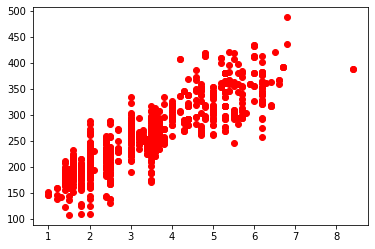

In [17]:
plt.plot(df['ENGINESIZE'], df['CO2EMISSIONS'], 'ro')

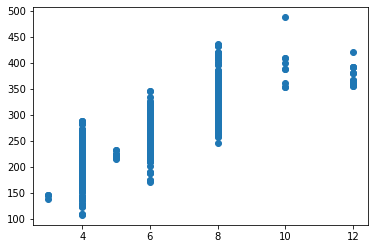

In [18]:
plt.scatter(df['CYLINDERS'], df['CO2EMISSIONS'])

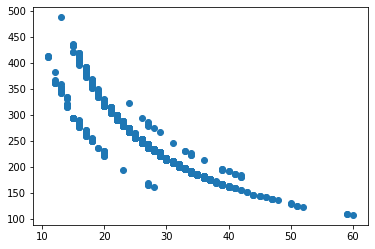

In [33]:
plt.scatter(df['FUELCONSUMPTION_COMB_MPG'], df['CO2EMISSIONS'])

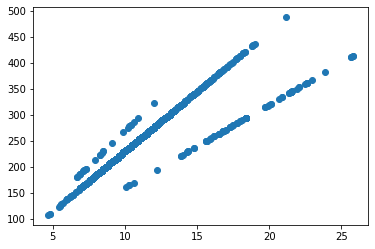

In [34]:
plt.scatter(df['FUELCONSUMPTION_COMB'], df['CO2EMISSIONS'])


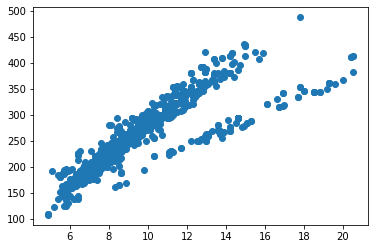

In [35]:
plt.scatter(df['FUELCONSUMPTION_HWY'], df['CO2EMISSIONS'])


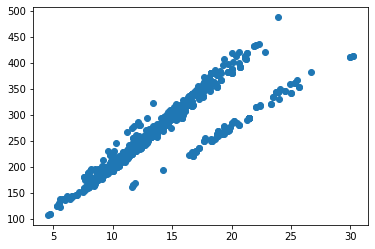

In [36]:
plt.scatter(df['FUELCONSUMPTION_CITY'], df['CO2EMISSIONS'])


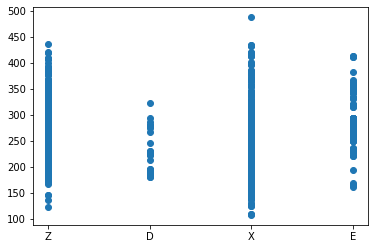

In [37]:
plt.scatter(df['FUELTYPE'], df['CO2EMISSIONS'])


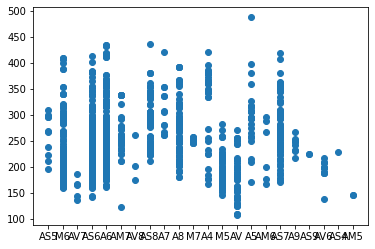

In [38]:
plt.scatter(df['TRANSMISSION'], df['CO2EMISSIONS'])

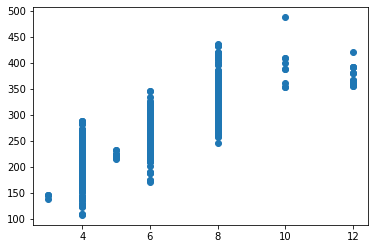

In [40]:
plt.scatter(df['CYLINDERS'], df['CO2EMISSIONS'])



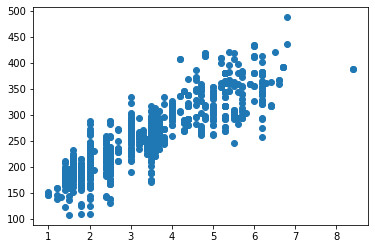

In [42]:
plt.scatter(df['ENGINESIZE'], df['CO2EMISSIONS'])

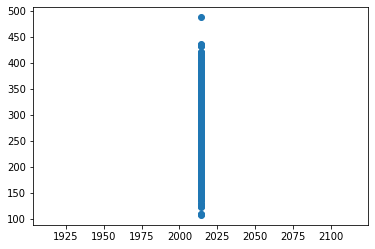

In [44]:
plt.scatter(df['MODELYEAR'], df['CO2EMISSIONS'])

### related parameters:
+ ENGINESIZE
+ CYLINDERS
+ FUELCONSUMPTION_CITY
+ FUELCONSUMPTION_HWY
+ FUELCONSUMPTION_COMB
+ FUELCONSUMPTION_COMB_MPG

In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


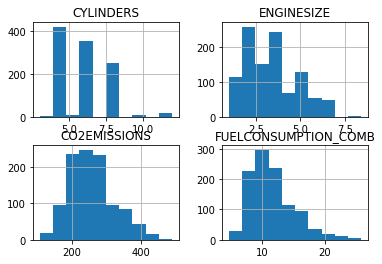

In [5]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

In [22]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]


In [23]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)


Coefficients:  [[39.3568025]]
Intercept:  [124.69121191]


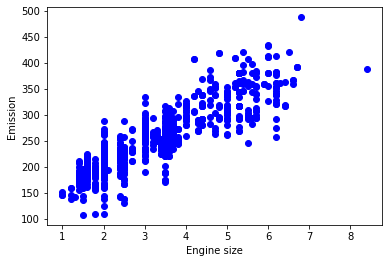

In [24]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [25]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.3568025]]
Intercept:  [124.69121191]


Text(0, 0.5, 'Emission')

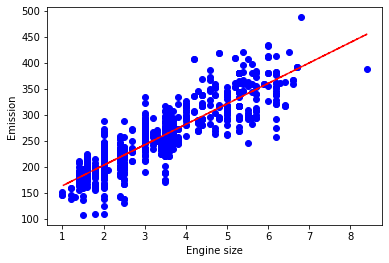

In [26]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-.r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [29]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 24.34
Residual sum of squares (MSE): 975.83
R2-score: 0.77
